In [0]:
from sklearn.model_selection import KFold, GroupKFold, StratifiedKFold, RepeatedKFold
import matplotlib.pyplot as plt
import numpy as np

For each test we will use 8 different folds, so we can compare the results

In [0]:
num_folds = 8

Let't take a look at our fake data, it will just consist of a list of numbers from 0 to 80, so we can then print them in

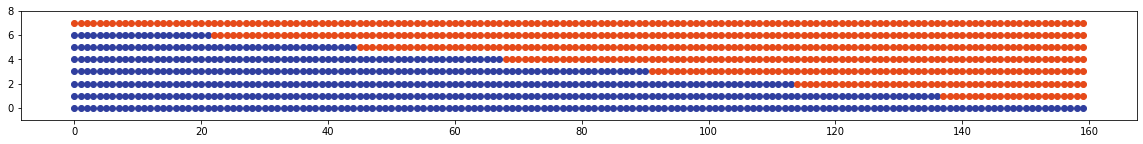

In [56]:
data = np.array(list(range(160))) # let

train_color = "#303f9f"
test_color = "#e64a19"

# this is the whole data
plt.rcParams["figure.figsize"] = (20,2)
plt.scatter(data, [0]*len(data), c=train_color, vmax=8)

# this is how an incremental train test split will look
for i in range(1, 8):
    splt = (7 - i) * len(data) // 7
    plt.scatter(data[:splt], [i]*len(data[:splt]), c=train_color)
    plt.scatter(data[splt:], [i]*len(data[splt:]), c=test_color)

plt.ylim(-1, 8)
plt.show()

# KFold

Let's take a look at a few simple KFold splits

0 140 20
1 140 20
2 140 20
3 140 20
4 140 20
5 140 20
6 140 20
7 140 20


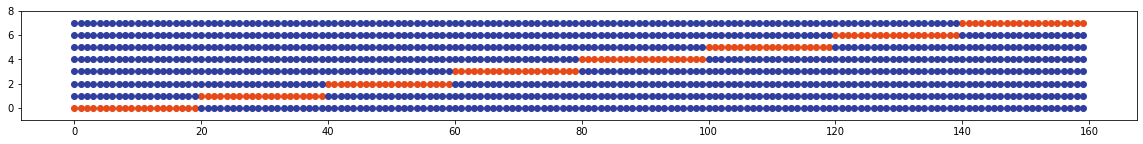

In [65]:
# Without random shuffle
kf = KFold(n_splits=num_folds)
for fold, (train_index, test_index) in enumerate(kf.split(data)):
    print(fold, len(train_index), len(test_index))
    plt.scatter(data[test_index], [fold]*len(data[test_index]), c=test_color)
    plt.scatter(data[train_index], [fold]*len(data[train_index]), c=train_color)
    
plt.ylim(-1, 8)
plt.show()

0 140 20
1 140 20
2 140 20
3 140 20
4 140 20
5 140 20
6 140 20
7 140 20


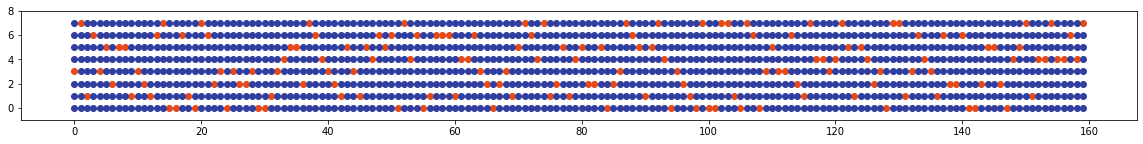

In [66]:
# with random shuffle
kf = KFold(n_splits=num_folds, random_state=42, shuffle=True)
for fold, (train_index, test_index) in enumerate(kf.split(data)):
    print(fold, len(train_index), len(test_index))
    plt.scatter(data[test_index], [fold]*len(data[test_index]), c=test_color)
    plt.scatter(data[train_index], [fold]*len(data[train_index]), c=train_color)
    
plt.ylim(-1, 8)
plt.show()

We can see in both cases there is no overlapping between the test samples, meaning that each sample will only be used for validation in one of the folds, and the splitting is even across folds

# GroupKFold

0 140 20
1 140 20
2 140 20
3 140 20
4 140 20
5 140 20
6 140 20
7 140 20


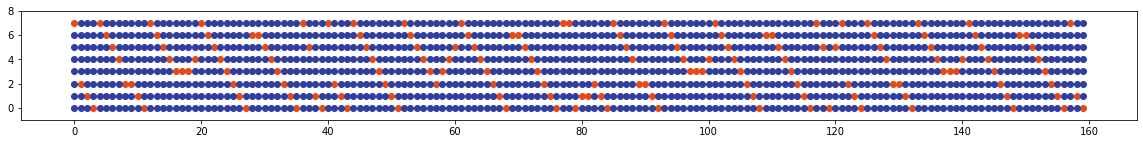

In [67]:
group_kfold = GroupKFold(n_splits=num_folds)
for fold, (train_index, test_index) in enumerate(group_kfold.split(data, groups=data)):
    print(fold, len(train_index), len(test_index))
    plt.scatter(data[test_index], [fold]*len(data[test_index]), c=test_color)
    plt.scatter(data[train_index], [fold]*len(data[train_index]), c=train_color)
    
plt.ylim(-1, 8)
plt.show()

By using the data as the groups we get a nice splitting, but it actually looks very similar to the shuffled KFolds, let's try with other combinations of the groups parameter

0 140 20
1 140 20
2 140 20
3 140 20
4 140 20
5 140 20
6 140 20
7 140 20


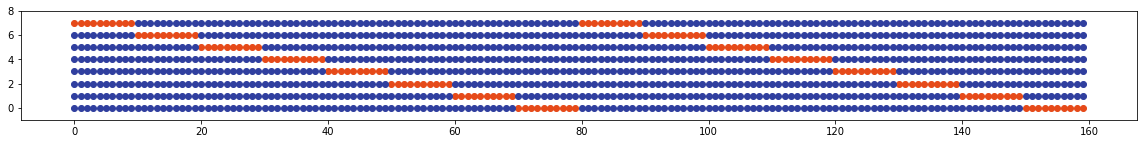

In [71]:
# 8 groups containing about 12% of the data split
groups = data // 10

group_kfold = GroupKFold(n_splits=num_folds)
for fold, (train_index, test_index) in enumerate(group_kfold.split(data, groups=groups)):
    print(fold, len(train_index), len(test_index))
    plt.scatter(data[test_index], [fold]*len(data[test_index]), c=test_color)
    plt.scatter(data[train_index], [fold]*len(data[train_index]), c=train_color)
    
plt.ylim(-1, 8)
plt.show()

This is basically the same as the unshuffled KFold split :/

Let's try to get a bit more creative with the groups...

0 107 53
1 132 28
2 142 18
3 144 16
4 144 16
5 148 12
6 151 9
7 152 8


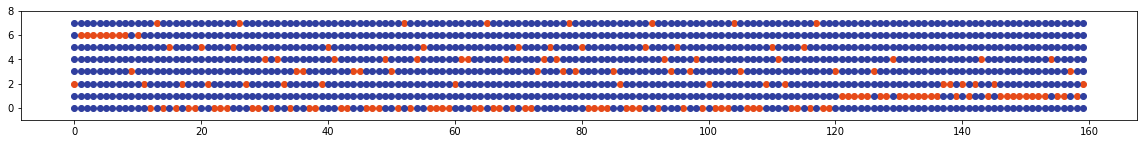

In [70]:
groups = np.zeros_like(data)
groups[data % 5 == 0] = 1
groups[data % 13 == 0] = 2
groups[data > 120] = 3
groups[data < 11] = 4
groups[np.random.randint(0, len(data), size=(20,))] = 5
groups[np.random.randint(0, len(data), size=(20,))] = 6
groups[np.random.randint(0, len(data), size=(20,))] = 7


group_kfold = GroupKFold(n_splits=num_folds)
for fold, (train_index, test_index) in enumerate(group_kfold.split(data, groups=groups)):
    print(fold, len(train_index), len(test_index))
    plt.scatter(data[test_index], [fold]*len(data[test_index]), c=test_color)
    plt.scatter(data[train_index], [fold]*len(data[train_index]), c=train_color)
    
plt.ylim(-1, 8)
plt.show()

Now things start to make more sense, it looks like the split is made based on th groups parameter, and ensures that samples from the same group do not appear in the test set of more than 1 fold, and that samples from a group do not appear in both training and test even if that means having an uneven ammount of train/test samples in each fold. 

This would be very useful if we know that for example a group of samples belong to the same experiment, and thus can be very similar to each other.

For example if we were training using video frames, we might not want to have samples from the same shot in the trainin and test, so this kfold strategy will put all samples from a group in either train or test.

# StratifiedKFold

0 128 32
1 128 32
2 144 16
3 144 16
4 144 16
5 144 16
6 144 16
7 144 16


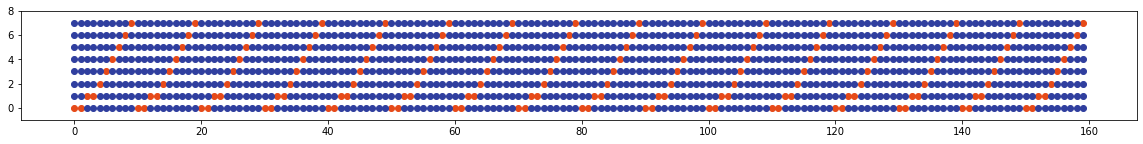

In [80]:
y = data // 10

stratified_kfold = StratifiedKFold(n_splits=num_folds)
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(data, y)):
    print(fold, len(train_index), len(test_index))
    plt.scatter(data[test_index], [fold]*len(data[test_index]), c=test_color)
    plt.scatter(data[train_index], [fold]*len(data[train_index]), c=train_color)
    
plt.ylim(-1, 8)
plt.show()

0 140 20
1 140 20
2 140 20
3 140 20
4 140 20
5 140 20
6 140 20
7 140 20


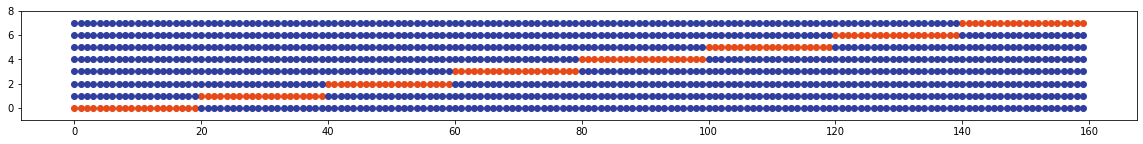

In [83]:
y = data % 20

stratified_kfold = StratifiedKFold(n_splits=num_folds)
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(data, y)):
    print(fold, len(train_index), len(test_index))
    plt.scatter(data[test_index], [fold]*len(data[test_index]), c=test_color)
    plt.scatter(data[train_index], [fold]*len(data[train_index]), c=train_color)
    
plt.ylim(-1, 8)
plt.show()

Apparently StratifiedKFold will try to have a balanced ammout of each label in every fold, that means that you'll always be training with at least one sample from each class, and validating with one sample of each class aswell. 

This is good when the data is very unrelated, but the data is unbalanced so you risk leaving out some sample class in training/validation.

# RepeatedKFold

0 140 20
1 140 20
2 140 20
3 140 20
4 140 20
5 140 20
6 140 20
7 140 20
8 140 20
9 140 20
10 140 20
11 140 20
12 140 20
13 140 20
14 140 20
15 140 20


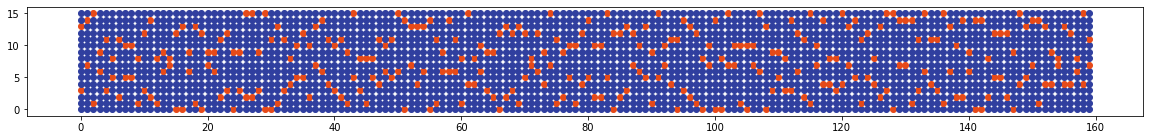

In [85]:
repeated_kfold = RepeatedKFold(n_splits=num_folds, n_repeats=2, random_state=42)
for fold, (train_index, test_index) in enumerate(repeated_kfold.split(data)):
    print(fold, len(train_index), len(test_index))
    plt.scatter(data[test_index], [fold]*len(data[test_index]), c=test_color)
    plt.scatter(data[train_index], [fold]*len(data[train_index]), c=train_color)
    
plt.ylim(-1, 16)
plt.show()

This is pretty interesting, this strategy will create N as many folds as you suggest, but will make sure that each sample appears in exactly N of the folds, so if you set 8 folds, and N == 2, it will create 16 folds, but will make sure that each sample appears randomly in 2 folds, but combined with other samples, so if you train 16 models, at least 2 models have **not** trained with each sampe, but might have trained with other samples.